**Name**: Dylan Bedetti  
**Student Number**: 21707115   
**Python**: 3.6



# Overview of Assginment
- we will look into Decision Trees and Support Vector Machine and how they can be used both for classification and regression problems.

### Modules required to run this notebook
> - numpy
- pandas
- matplotlib
- seaborn
- sklearn
- Ipython 
- graphviz

# Project 1


In [134]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

# set max output to 10 rows
pd.set_option('max_rows', 10)

# reading in data
data = pd.read_fwf('ecoli_data.txt', header = None)
data.columns = ['Sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'classdist']
data

,Sequence,mcg,gvh,lip,chg,aac,alm1,alm2,classdist
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


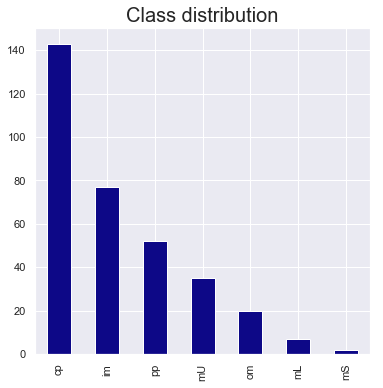

In [135]:
f = plt.figure(figsize = (6,6))
data['classdist'].value_counts().plot.bar(cmap = 'plasma')
plt.title('Class distribution', fontsize = 20);

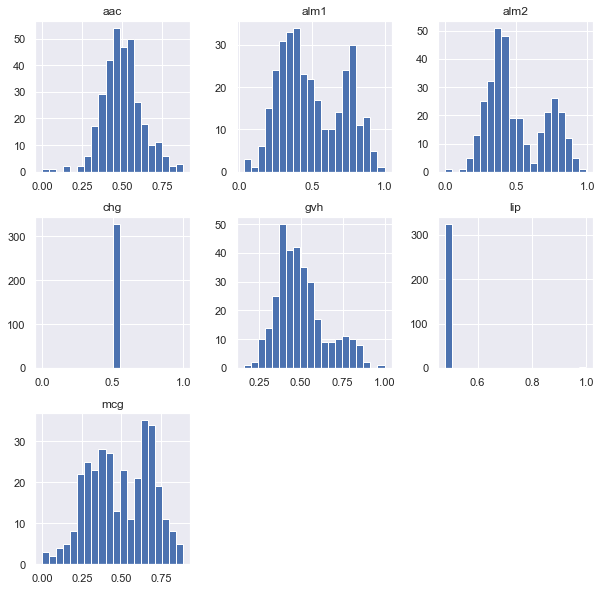

In [136]:
# lets find the values that have a frequency of occurance over 10, we will store these into a list called values
values = data['classdist'].value_counts()[data['classdist'].value_counts() > 10].index.to_list()
# now lets extract only these values from the DataFrame, also make sure we reset the index to reflect the new DataFrame
data = data.loc[data['classdist'].isin(values)].reset_index(drop = True)

# lets check out the distribution of the continuous variables
data.hist(figsize = (10,10), bins = 20);

## Observations

> distributions such as `aac` seem to follow a normal distribution 

> distributions such as `alm2` and `alm1` seem to follow a bimodel normal distribution
- possibly apply quantile transformer

> the distributions of `chg` and `lip` seem to only contain a single value for the entire dataset  
- If a feature is constnat throughout the dataset it will not provide any predicitive value, therefore we should remove it

> all of the parameters are within the range of 0 to 1. 
- equal relative ranges make is easier for our machine learning model to find relationships

**Why does it matter that distributions are normal??**

[More Info](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)

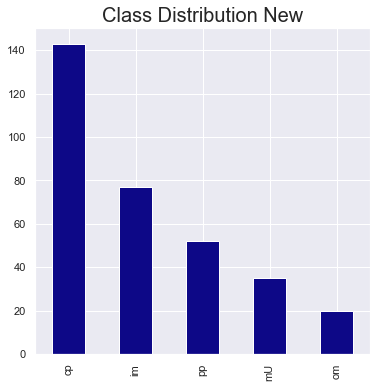

In [137]:
# Lets plot our classes on a bar plot
f = plt.figure(figsize = (6,6))
data['classdist'].value_counts().plot.bar(cmap = 'plasma')
plt.title('Class Distribution New', fontsize = 20);

# Enconding

- The variable that we are predicting (the class column) is a categorical variable - therefore we need some way of encoding this as our machine learning model cannot directly deal with strings
- There are a number of different encoding techniques that can we used, some make more sense then others to use on our ordinal data

## 3 different types of Categorical Data

> **Nominal** data is labeled or named data which can be divided into various groups that do not overlap. The relative differences between each label cannot be quantified. An example of nominal data would be a list of peoples hair colour:
- Brown
- Black
- Blonde
- Gray
- Other  
>
> Each category is mutually exclusive and collectively it is exhuastive. It would **not** make sense to encode the catergories as integers from 0 to 5 as the Machine Learning algorithm would then treat each category as relative to another - but how would you quantify if Brown is closer to Gray or Blonde? 

> **Ordinal** data has signification order and magnitude. It is typically used for scaled data where we have some sense that one category is better than another, but we do not know by how much. An example would be a happiness scale:
- Very unhappy
- Unhappy
- Okay
- Happy
- Very Happy  
>
> While we recognise that Happy should greater than Okay and Okay should be greater than Unhappy, it is hard to quantitatively measure the difference between each value. Encoding ordinal data is very context dependent

> **Interval** data is where we know both the order and exact differences between the categories. Internval scales are nice because they can be easily encoded. An example of Interval data would be measurements of temperature:
- 30&deg;
- 31&deg;
- 32&deg;
- 33&deg;
- 34&deg;
>
> We know the difference between each measurment is exactly one unit. This categorical data can be encoded directly into numerical data.

## 3 popular Econding Techniques

> **One-Hot Encoding** (dummy encoding) will produce one feature for each category that will be encoding. Therefore you will end up with n more columns for the n categories that you have. If the feature has high cardinality you will end up with a lot of columns - and will find yourself trying to deal with the curse of dimensionality.
>
> One-Hot Encoding is best used for Nominal data. Below is an example of One-Hot Encoding

Hair Colour | Brown | Black | Blonde | Gray | Other
--- | --- | --- | --- | --- | ---
Brown | 1 | 0 | 0 | 0 | 0 |
Black | 0 | 1 | 0 | 0 | 0 |
Blonde | 0 | 0 | 1 | 0 | 0 |
Gray | 0 | 0 | 0 | 1 | 0 |
Other | 0 | 0 | 0 | 0 | 1 |

> **Ordinal Encoding** (label encoding) is the simplest type of encoding, it coverts the string or object labels to integers. Ordinal encoding is best used for Ordinal or Interval data. Below is an example. 

Value | Encoding
--- | --- 
a | 1
a | 1
b | 2
a | 1
c | 3

> **Target Encoding** (mean encoding) replaces a categorical variable with the mean of the target variable (which can be categorical or numerical). We can only use this type of encoding on the predicitve variables. This type of encoding can be used on all types of categorical data. Here is an example that is predicting if it will be a sunny day:

Day | Mean of Target
--- | --- 
Monday | 0.1
Tuesday | 0.9
Wednesday | 0.7
Thursday | 0.5
Friday | 0.2


## Reasoning for my encoding decision

> I have decided to use Label Enconder for encoding the target variable. This is the same as ordinal encoding as dicussed above. While it may not be the best encoder for this dataset (because the categoical data isn't ordianl or intereval data) I have chosen to use it as it is a simple approach. In the future it may be worth experimenting with more complicated approaches for encoding, but for this Task I believe ordinal encoding will suffice. 

> **Note:** Both SVC and DT are already able to handle categorical variables and actually use the same LabelEncoding technique to do so. However I think it is a good exercise to understand how encoding could effect your algorithm

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# column 'chg' only contains the value 0.5, therefore we will remove it
data.drop(['chg'], axis = 1, inplace= True, errors = 'ignore')
# removing the Sequence column as it does not provide any value in predicting the class - this is because for each row it has a different value. 
data.drop(['Sequence'], inplace= True, axis= 1, errors = 'ignore')

# using a label encoder for the target variable
# while the target variable is nominal and may not be suited for label encoding - this will allow us to create a simple model
LE = LabelEncoder()
y = LE.fit_transform(data['classdist'])
X = data.drop(['classdist'], axis = 1)
labels = list(LE.classes_)
cols = list(X.columns)

# split into X, y, train and test with 80/20 split and using a random state to ensure repeatability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# defining models
model1 = DecisionTreeClassifier(random_state=1)
model2 = SVC(random_state=1, gamma= 'auto')

# training models with default hyperparameters
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# making model predictions
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# summarising accuracies
print('Decision Tree Classifier accuracy - test: '+ str(round(100*accuracy_score(y_test, pred1),2)) + '%')
print('Support Vector Machine accuracy - test: '+ str(round(100*accuracy_score(y_test, pred2),2)) + '%')
print('')
print('Decision Tree Classifier accuracy - train: '+ str(round(100*accuracy_score(y_train, model1.predict(X_train)),2)) + '%')
print('Support Vector Machine accuracy - train: '+ str(round(100*accuracy_score(y_train, model2.predict(X_train)),2)) + '%')
print('')
print('Decision Tree Classifier F1 Score - test: '+ str(round(100*f1_score(y_test, pred1,average = 'macro'),2)) + '%')
print('Support Vector Machine F1 Score - test: '+ str(round(100*f1_score(y_test, pred2,average = 'macro'),2)) + '%')
print('')
print('Decision Tree Classifier F1 Score - train: '+ str(round(100*f1_score(y_train, model1.predict(X_train),average = 'macro'),2)) + '%')
print('Support Vector Machine F1 Score - train: '+ str(round(100*f1_score(y_train, model2.predict(X_train),average = 'macro'),2)) + '%')

Decision Tree Classifier accuracy - test: 81.82%
Support Vector Machine accuracy - test: 81.82%

Decision Tree Classifier accuracy - train: 100.0%
Support Vector Machine accuracy - train: 75.86%

Decision Tree Classifier F1 Score - test: 67.7%
Support Vector Machine F1 Score - test: 51.53%

Decision Tree Classifier F1 Score - train: 100.0%
Support Vector Machine F1 Score - train: 47.51%


## Observations - Models with default parameters

> ### Train

Metric | Decision Tree | Support Vector Machine
--- | --- | ---
Accuracy | 100% | 76%
F1 Score | 100% | 48%

> ### Test

Metric | Decision Tree | Support Vector Machine
--- | --- | ---
Accuracy | 82% | 82%
F1 Score | 68% | 52%

> We have considered two different models, Decision Tree Classifier (DT) and Support Vector Machine (SVM). We have used two different metrics, Accuracy and F1 Score.

> The DT was able to completely fit the train data achieveing a score of 100%. However when tested on the testing data it only score 82% and 68%. We can conclude that the Classifier has overfit the training set. 

> The SVM with default parameters seemed to achieve low variance as it scores are relatively equal over the two datasets. However I think the score could be improved with some tuning. 


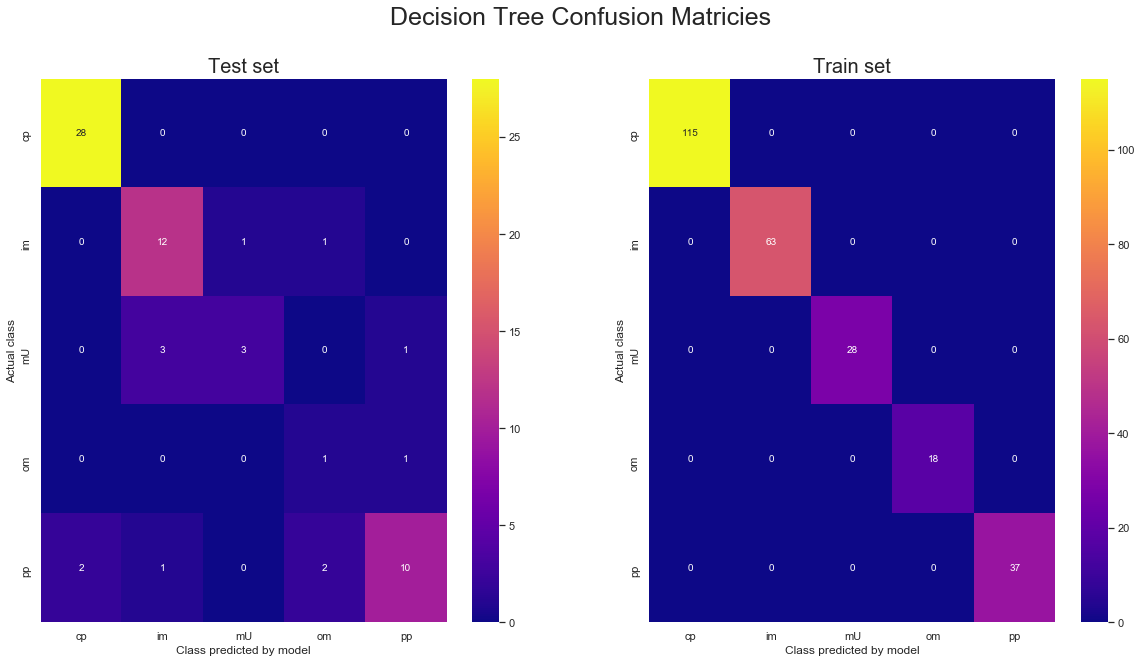

In [139]:
# Decison Tree Confusion Matrices on train and test set
CF1_test = confusion_matrix(LE.inverse_transform(y_test), LE.inverse_transform(pred1), labels = labels)
CF1_train = confusion_matrix(LE.inverse_transform(y_train), LE.inverse_transform(model1.predict(X_train)), labels = labels)

# plotting the confusion matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
sns.heatmap(CF1_test, annot=True, fmt = '.4g', xticklabels= labels, yticklabels=labels, cmap = 'plasma',ax = ax1);
ax1.set_title('Test set', fontsize = 20)
ax1.set_xlabel('Class predicted by model')
ax1.set_ylabel('Actual class')
sns.heatmap(CF1_train, annot=True, fmt = '.4g', xticklabels= labels, yticklabels=labels, cmap = 'plasma',ax = ax2);
ax2.set_title('Train set', fontsize = 20)
ax2.set_xlabel('Class predicted by model')
ax2.set_ylabel('Actual class')
f.suptitle("Decision Tree Confusion Matricies", fontsize=25);

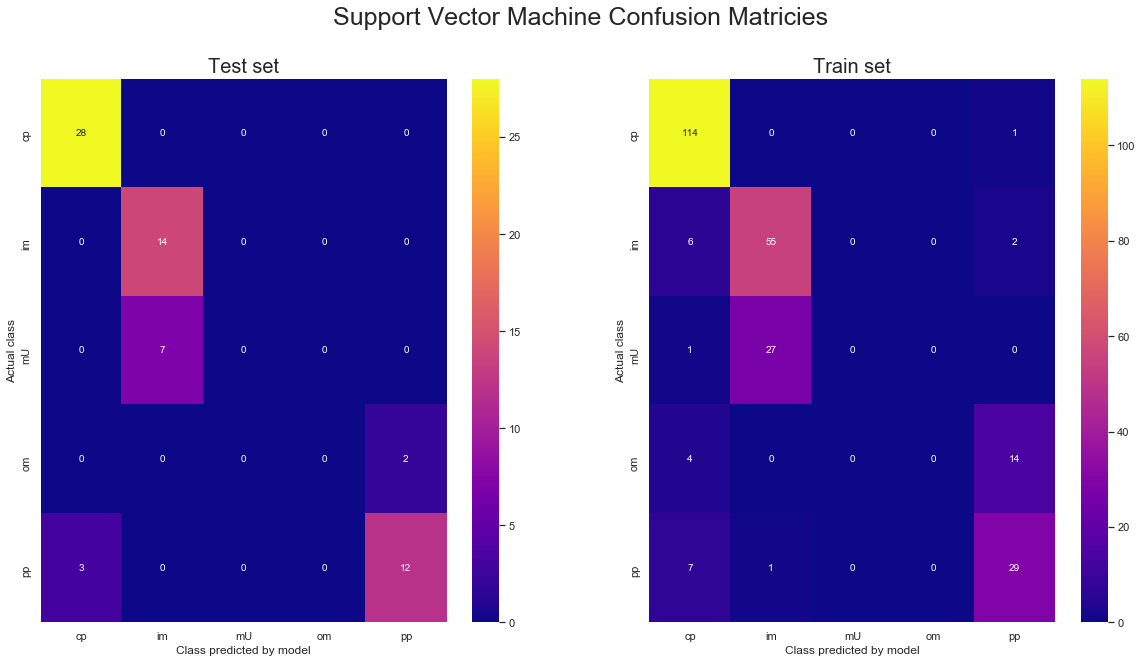

In [140]:
# Support Vector Machine Confusion Matrices on train and test set
CF2_test = confusion_matrix(LE.inverse_transform(y_test), LE.inverse_transform(pred2), labels = labels)
CF2_train = confusion_matrix(LE.inverse_transform(y_train), LE.inverse_transform(model2.predict(X_train)), labels = labels)

# plotting the confusion matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
sns.heatmap(CF2_test, annot=True, fmt = '.4g', xticklabels= labels, yticklabels=labels, cmap = 'plasma',ax = ax1);
ax1.set_title('Test set', fontsize = 20)
ax1.set_xlabel('Class predicted by model')
ax1.set_ylabel('Actual class')
sns.heatmap(CF2_train, annot=True, fmt = '.4g', xticklabels= labels, yticklabels=labels, cmap = 'plasma',ax = ax2);
ax2.set_title('Train set', fontsize = 20)
ax2.set_xlabel('Class predicted by model')
ax2.set_ylabel('Actual class')
f.suptitle("Support Vector Machine Confusion Matricies", fontsize=25);

## But how do these models work?

> ### Decision Trees (DT)
> Decision trees are supervised non-parametric (do not require normal distributions) models. They can be used for both classification and regression problems. The aim of the model is to create rules that split the data into different categories. These rules are based on the data in the training set. Rules are structured as if-then-else statements, they guide future estimated down a branch to a final estimation. The deeper a tree is the more complex the model becomes. 
>
> Some advantages:
- simple to understand and interpret
- require little data preparation (doesn't require data to be scaled)
- handle both numerical and categorical data
- white box
>
> some disadvantages:
- can create overly complex trees which overfit data quickly
- can be unstable as outliers can cause completely different results (can use ensembles and pruning to adjust for this)

> ### Support Vector Machines (SVM)
> Support Vector Machines are supervised learning model that creates binary thresholds between two classes, it tries to maximise the 'road' between the data. This binary method can be combined in an OVA approach to allow for multiclass classification. 
>
> Some advantages:
- good for high dimensional spaces
- different kernel functions (decision function) can be used for different problems
>
> Some disadvantages:
- requires some regularisation tuning
- does not directly provide probability estimations 

## Feature importance and visualisation of DT
- feature importance is only avaliable in linear SVM
- feature importance can tell use how important invdividual features are in determing the class
- this can help with dimensionality reduction 


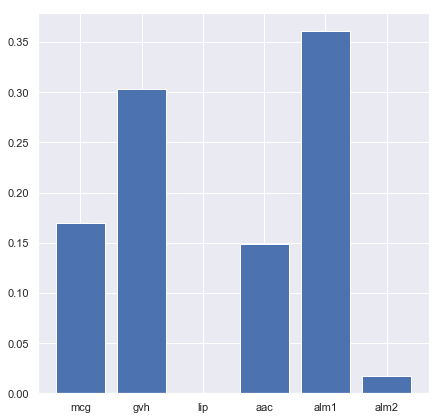

In [161]:
# plotting the feature importance
f = plt.figure(figsize = (7,7))
plt.bar(height = list(model1.feature_importances_), x = cols)
plt.show()
# height represents the importance of each feature

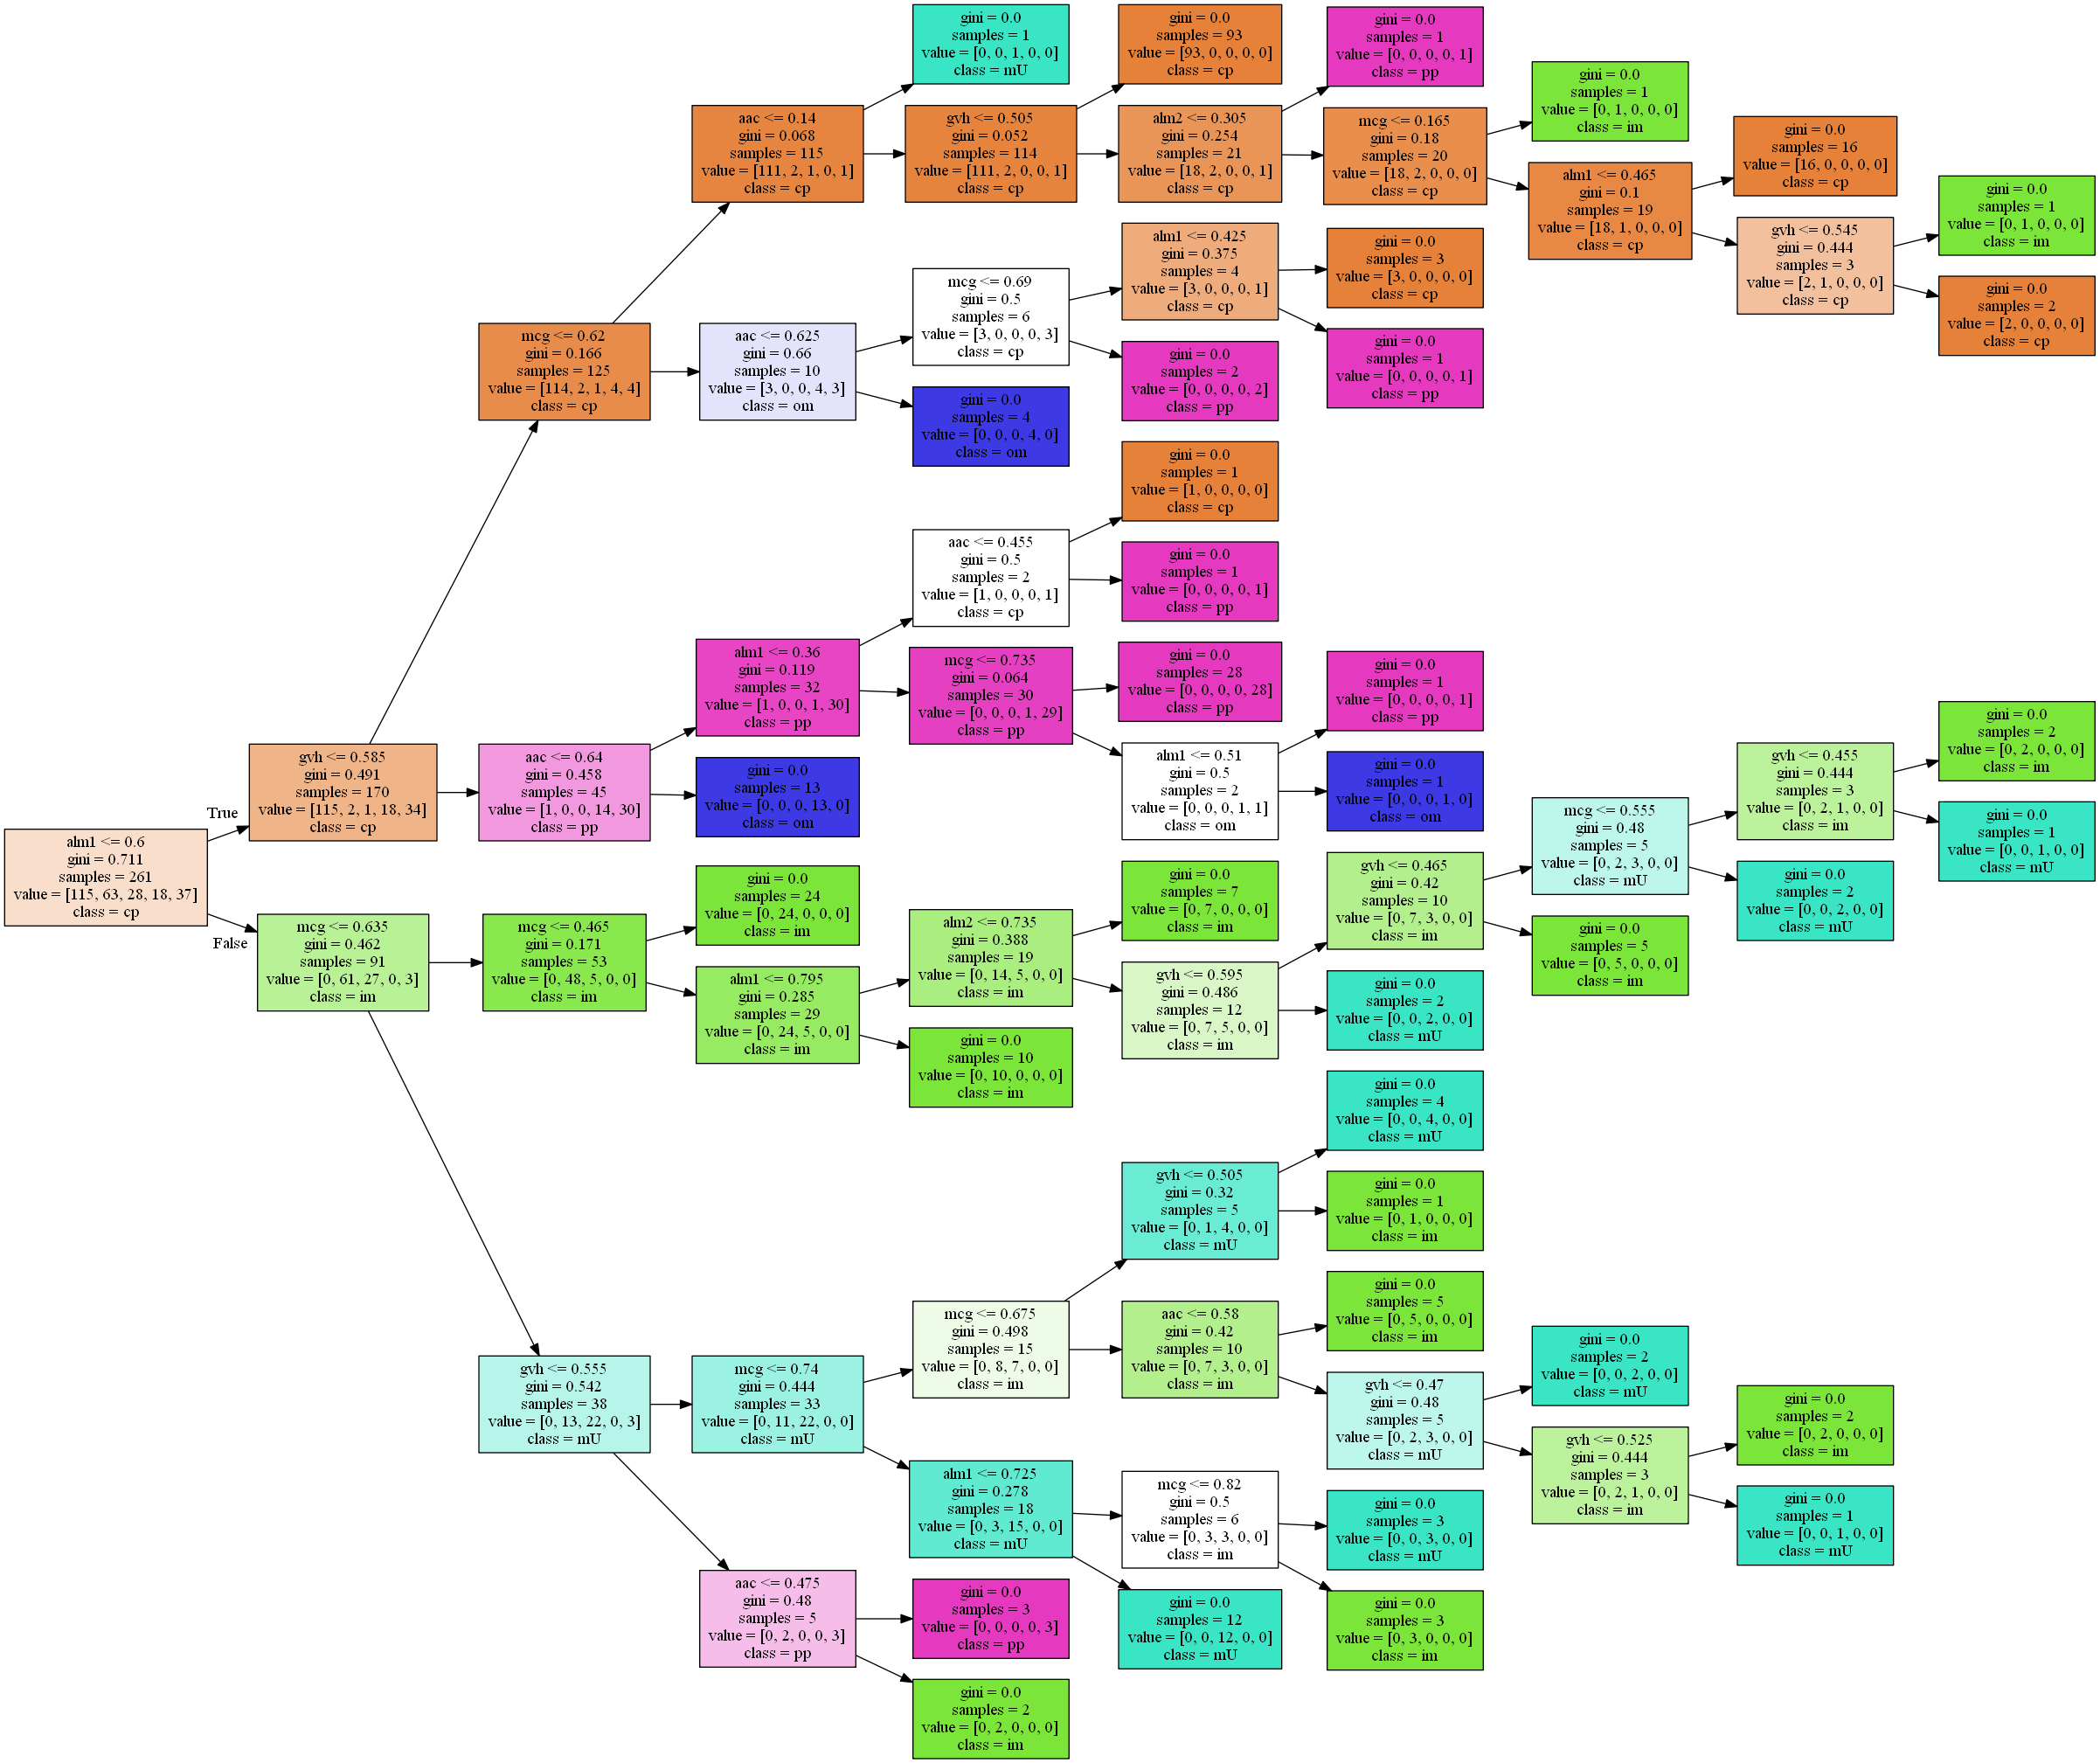

In [118]:
# for this visualistion to work you will need graphviz install locally on your computer
# this can be achieved by pip install python-graphviz
from sklearn.tree.export import export_graphviz
from IPython.display import Image
import graphviz


# Creating a visual model in dot format and then converting it to png format
export_graphviz(model1, out_file='tree.dot', feature_names= cols, class_names=labels, filled=True, rotate=True)
graphviz.render('dot', 'png', 'tree.dot')
Image("tree.dot.png")

# colours represent different classes, colours will be combined if classes are mixed

# gini impurity  is a measure of how often a randomly chosen 
# element from the set would be incorrectly labeled if it was 
# randomly labeled according to the distribution of labels in the 
# subset. 

# can use either gini impurity or information gain for splitting decision trees

## Lets try and optimise the models

## Decison Tree


In [119]:
from sklearn.model_selection import GridSearchCV

# setting parameters to use with gridsearch
parameters = {
    'criterion':('gini', 'entropy'),
    'splitter':('best', 'random'),
    'max_depth':[2,3, 5],
    'max_features': [5, 6]
}

# setting up the grid search cross validation with 5 folds
clf = GridSearchCV(model1, parameters, cv=5, verbose = 1, n_jobs= -1);
clf.fit(X_train, y_train);

# printing out results
print('Best score and parameter combination = ')
print(clf.best_score_)    
print(clf.best_params_)  

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best score and parameter combination = 
0.842911877394636
{'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.4s finished


## Support Vector Machine

In [120]:
# SVM

# defining parameteres to use with gridsearch
parameters = {
    'kernel':('rbf', 'linear', 'poly', 'sigmoid'),
    'max_iter':[5, 10, 50],
    'degree':[1,2,3]
}

# setting up the grid search cross validation with 5 folds
clf = GridSearchCV(model2, parameters, cv=5, n_jobs= -1);
clf.fit(X_train, y_train);

# printing out results
print('Best score and parameter combination = ')
print(clf.best_score_)    
print(clf.best_params_)  

Best score and parameter combination = 
0.8544061302681992
{'degree': 2, 'kernel': 'poly', 'max_iter': 10}


## SVM with StandardScaler

In [121]:
from sklearn.preprocessing import StandardScaler

# defining the StandardScaler object and applying is to the input features
scaler =  StandardScaler()
X_train_SS = scaler.fit_transform(X_train)
X_test_SS = scaler.transform(X_test)

# fitting and predicting with the model
model3 = SVC(random_state=1, gamma= 'auto')
model3.fit(X_train_SS, y_train)
pred3 = model3.predict(X_test_SS)

# printing out results
print('SVM Normalised accuracy - test: '+ str(round(100*accuracy_score(y_test, pred3),2)) + '%')
print('SVM Normalised accuracy - train: '+ str(round(100*accuracy_score(y_train, model3.predict(X_train_SS)),2)) + '%')
print('SVM Normalised F1 Score - test: '+ str(round(100*f1_score(y_test, pred3,average = 'macro'),2)) + '%')
print('SVM Normalised F1 Score - train: '+ str(round(100*f1_score(y_train, model3.predict(X_train_SS),average = 'macro'),2)) + '%')

SVM Normalised accuracy - test: 87.88%
SVM Normalised accuracy - train: 90.42%
SVM Normalised F1 Score - test: 79.43%
SVM Normalised F1 Score - train: 87.93%


## SVM Scaled optimised

In [122]:
# SVM normalised 

# defining parameters to use in gridsearch
parameters = {
    'kernel':('rbf', 'linear', 'poly', 'sigmoid'),
    'max_iter':[5, 10, 50],
    'degree':[1,2,3]
}

# setting up the grid search cross validation with 5 folds
clf = GridSearchCV(model3, parameters, cv=5, n_jobs= -1);
clf.fit(X_train_SS, y_train);

# printing out results
print('Best score and parameter combination = ')
print(clf.best_score_)    
print(clf.best_params_)  

Best score and parameter combination = 
0.8850574712643678
{'degree': 1, 'kernel': 'poly', 'max_iter': 50}


## SVM with different Scaling techniques
> mcg - bimodal distribution - quantile transform   
> gvh -  bimodal distribution - quantile transform   
> lip - close to singel value - standard scaler   
> aac - normal distribution - standard scaler   
> alm1 - bimodal distribution - quantile transform   
> alm2 - bimodal distribution - quantile transform   

In [123]:
from sklearn.preprocessing import QuantileTransformer

# defining the quantile transformer object
QT = QuantileTransformer()
X_train_new = np.concatenate((X_train_SS[:, [2,3]], QT.fit_transform(X_train.iloc[:, [0,1,4,5]])), axis = 1)
X_test_new = np.concatenate((X_test_SS[:, [2,3]], QT.transform(X_test.iloc[:, [0,1,4,5]])), axis = 1)

# training and predicting with the model
model4 = SVC(random_state=1, gamma= 'auto')
model4.fit(X_train_new, y_train)
pred4 = model4.predict(X_test_new)

# printing out results
print('SVM Normalised accuracy - test: '+ str(round(100*accuracy_score(y_test, pred4),2)) + '%')
print('SVM Normalised accuracy - train: '+ str(round(100*accuracy_score(y_train, model4.predict(X_train_new)),2)) + '%')
print('SVM Normalised F1 Score - test: '+ str(round(100*f1_score(y_test, pred4,average = 'macro'),2)) + '%')
print('SVM Normalised F1 Score - train: '+ str(round(100*f1_score(y_train, model4.predict(X_train_new),average = 'macro'),2)) + '%')

SVM Normalised accuracy - test: 84.85%
SVM Normalised accuracy - train: 82.38%
SVM Normalised F1 Score - test: 66.57%
SVM Normalised F1 Score - train: 69.91%


## SVM Scaled new attempt optimised

In [124]:

parameters = {
    'kernel':('rbf', 'linear', 'poly', 'sigmoid'),
    'max_iter':[100, 1000],
    'degree':[1,2,3],
    'C' : [1, 2,3]
}

# setting up the grid search cross validation with 5 folds
clf = GridSearchCV(model4, parameters, cv=5, n_jobs= -1);
clf.fit(X_train_new, y_train);

print('Best score and parameter combination = ')
print(clf.best_score_)    
print(clf.best_params_)  

Best score and parameter combination = 
0.8659003831417624
{'C': 2, 'degree': 1, 'kernel': 'linear', 'max_iter': 100}


## Comparison of performances

> We have found that we can increase the accuracy of the support vector machine by using scaling. Our best score went from 85.4% to 88.5% by using a standard scaler.
>
> I found that I could not increase that performance by using a quantile transformer instead which helps to scale a bimodal distribution into a normal one. 

> We achieved a best score of 85.4% for the decision tree.

[Info about Transformers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html)

## Conclusion
> We can achieved signification results from using the default hyper-parameters, however if we take care and do a bit more preprocessing we can further increase our accuracy. 


# Project 2

In [163]:
# import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# reading the dataset
Solar = pd.read_csv('SolarExposure_2018_Data.csv')
Temp = pd.read_csv('Temperature_2018_Data.csv')

# combining the datasets
all_data = pd.concat([Temp.iloc[:, [3,4,5]], Solar.iloc[:, 5]], axis = 1)
columns = ['Month', 'Day', 'Temp', 'Solar']
all_data.columns = columns

# splitting into target and input variables
y = all_data['Temp']
X = all_data.drop(['Temp'], axis = 1)

# train-test split of 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# defining the models
model1 = DecisionTreeRegressor(random_state=1)
model2 = SVR(gamma = 'auto')

# fitting the models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predicting with the models
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# displaying all the data
all_data

,Month,Day,Temp,Solar
0,1,1,34.0,31.8
1,1,2,37.7,31.8
2,1,3,29.8,31.7
3,1,4,30.9,31.6
4,1,5,26.1,24.8
...,...,...,...,...
360,12,27,26.7,29.7
361,12,28,25.4,29.5
362,12,29,27.6,31.8
363,12,30,28.9,31.9


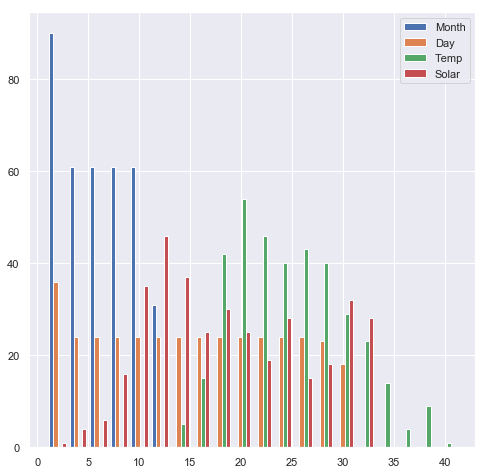

In [170]:
# pltting the distribution of the variables on a histograms

plt.figure( figsize = (8,8))
plt.hist([all_data['Month'],all_data['Day'], all_data['Temp'], all_data['Solar']], bins = 20, label = columns)
plt.legend()
plt.show()

# days and months have a uniform disitribution, Temp is roughly normal and solar seems to be bimodal

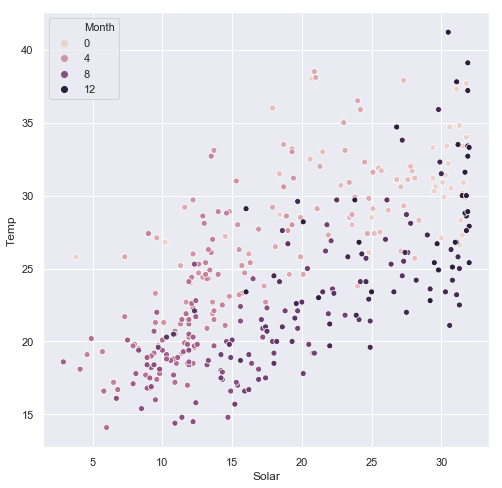

In [127]:
# creating a scatter plot between the Temp and Solar variables
# we can seem relationship
# the colour of the points indicate the month
f = plt.figure(figsize = (8,8))
sns.scatterplot(x = all_data['Solar'], y = all_data['Temp'], hue = all_data['Month']);

## Include info about MSE

In [128]:
# printing our scores for both models on both sets of data

print('Decision Tree Regresson MSE - test: '+ str(round(100*mean_squared_error(y_test, pred1),2)))
print('Support Vector Machine MSE - test: '+ str(round(100*mean_squared_error(y_test, pred2),2)))
print('')
print('Decision Tree Regresson MSE - train: '+ str(round(100*mean_squared_error(y_train, model1.predict(X_train)),2)))
print('Support Vector Machine MSE - train: '+ str(round(100*mean_squared_error(y_train, model2.predict(X_train)),2)))

Decision Tree Regresson MSE - test: 1305.19
Support Vector Machine MSE - test: 1980.66

Decision Tree Regresson MSE - train: 0.0
Support Vector Machine MSE - train: 1790.99


## Observations
> - DT has over fit the data again, achieving a MSE on training of 0
- SVM has low variance, achieveing similar score on both set of data
- SVM could possibly be improved by scaling the data
- an MSE of around 1500 is very high, that is an average offset of around 40, and given that they temp only range between 15 and 40 it means that our estimates are complete off.

## Now lets scale the data


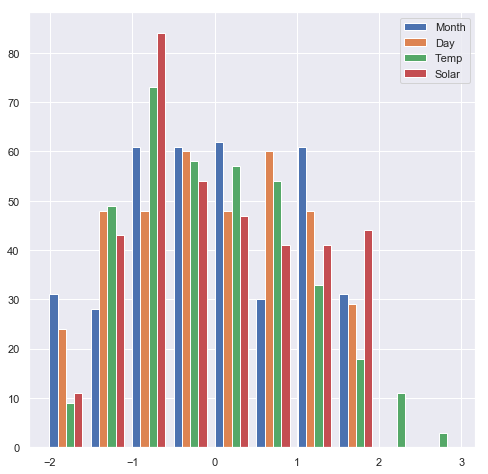

In [129]:
scaler =  StandardScaler()

SS = StandardScaler()

all_data = SS.fit_transform(all_data)
    
# splitting into target and input variables
y = all_data[:, 2]
X = all_data[:, [0,1,3]]

# train-test split of 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# defining the models
model3 = DecisionTreeRegressor(random_state=1)
model4 = SVR(gamma = 'auto')

# fitting the models
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

# predicting with the models
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

# plotting distribution
plt.figure( figsize = (8,8))
plt.hist([all_data[:, 0], all_data[:, 1], all_data[:, 2], all_data[:, 3]], label= columns)
plt.legend()
plt.show()

In [130]:
# printing our results

print('Decision Tree Regresson MSE - test: '+ str(round(100*mean_squared_error(y_test, pred3),2)))
print('Support Vector Machine MSE - test: '+ str(round(100*mean_squared_error(y_test, pred4),2)))
print('')
print('Decision Tree Regresson MSE - train: '+ str(round(100*mean_squared_error(y_train, model3.predict(X_train)),2)))
print('Support Vector Machine MSE - train: '+ str(round(100*mean_squared_error(y_train, model4.predict(X_train)),2)))

Decision Tree Regresson MSE - test: 43.49
Support Vector Machine MSE - test: 33.01

Decision Tree Regresson MSE - train: 0.0
Support Vector Machine MSE - train: 29.59


## Observations
> Both models greatly improved performance after the data was scaled with Standard Scaler. The SVM achieved a slightly better score averaging only to be off by 5.7&deg; on average. We can now try and improve this even more by using gridsearch.